# Importing the libaries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [2]:
df = pd.read_csv('spotify_data.csv')
df.head(5)

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [3]:
df.drop('Unnamed: 0', inplace = True, axis = 1)
df_cleaned = df.dropna()

# Import lyrics dataset

In [5]:
import json

In [6]:
# new_df is from a new kaggle dataset that has lyrics 
# combined_df includes artist name
# df_with_lyrics original dataset with lyrics merged

In [7]:
from ast import literal_eval
new_df = pd.read_csv('spotify_tracks.csv')
new_df['artist_id'] = new_df['artists_id'].apply(lambda x: literal_eval(x)[0])
new_df.head(5)

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type,artist_id
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track,3mxJuHRn2ZWD5OofvJtDZY
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track,4xWMewm6CYMstu0sPgd9jJ
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track,3hYaK5FF3YAglCj5HZgBnP
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track,2KQsUB9DRBcJk17JWX1eXD
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track,3hYaK5FF3YAglCj5HZgBnP


In [8]:
new_df['artists_id'].dtype

dtype('O')

In [9]:
artist_df = pd.read_csv('spotify_artists.csv')
artist_df.head(5)

,Unnamed: 0,artist_popularity,followers,genres,id,name,track_id,track_name_prev,type
0,0,44,23230,"['sertanejo', 'sertanejo pop', 'sertanejo trad...",4mGnpjhqgx4RUdsIJiURdo,Juliano Cezar,0wmDmAILuW9e2aRttkl4aC,track_9,artist
1,1,22,313,[],1dLnVku4VQUOLswwDFvRc9,The Grenadines,4wqwj0gA8qPZKLl5WVqXml,track_30,artist
2,2,26,1596,['danish pop rock'],6YVY310fjfUzKi8hiqR7iK,Gangway,1bFqWDbvHmZe2f4Nf9qaD8,track_38,artist
3,3,31,149,['uk alternative pop'],2VElyouiCfoYPDJluzwJwK,FADES,3MFSUBAidPzRBbIS7BDj1S,track_34,artist
4,4,21,11,['french baroque'],4agVy03qW8juSysCTUOuDI,Jean-Pierre Guignon,2r3q57FhxdsCyYr0kuDq4b,track_26,artist


In [10]:
combined_df = pd.merge(new_df, artist_df[['id', 'name']], left_on='artist_id', right_on='id', how='left', suffixes=['', '_artist'])

In [11]:
combined_df.columns

Index(['Unnamed: 0', 'acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type', 'artist_id', 'id_artist', 'name_artist'],
      dtype='object')

In [12]:
combined_df.dropna(inplace=True)

In [13]:
new_df.shape

(101939, 33)

In [14]:
lyrics_df = new_df[['uri', 'lyrics']]
lyrics_df['track_id'] = lyrics_df['uri'].apply(lambda x: x.split(':')[2])
lyrics_df = lyrics_df.drop(columns=['uri'])
lyrics_df.head(5)

C:\Users\siriu\AppData\Local\Temp\ipykernel_36744\3652009413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyrics_df['track_id'] = lyrics_df['uri'].apply(lambda x: x.split(':')[2])


,lyrics,track_id
0,\r\n\r\nPerhaps I am bound to be restless\r\nA...,5qljLQuKnNJf4F4vfxQB0V
1,\r\nYour Gods and my Gods-do you or I know whi...,3VAX2MJdmdqARLSU5hPMpm
2,"\r\n\r\nClosed off from love, I didn't need th...",1L3YAhsEMrGVvCgDXj2TYn
3,"\r\nPAIN, n. An uncomfortable frame of mind th...",6aCe9zzoZmCojX7bbgKKtf
4,"\r\n\r\nClosed off from love, I didn't need th...",1Vo802A38tPFHmje1h91um


In [15]:
df_with_lyrics = pd.merge(df_cleaned, lyrics_df, on='track_id', how='left')
df_with_lyrics.head(5)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3,\r\n\r\nWhen I look into your eyes\r\nIt's lik...
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4,NaN
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4,NaN
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4,NaN
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4,NaN


In [16]:
df_with_lyrics.isna().sum()

artist_name               0
track_name                0
track_id                  0
popularity                0
year                      0
genre                     0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
duration_ms               0
time_signature            0
lyrics              1144525
dtype: int64

In [17]:
df_with_lyrics.shape

(1159748, 20)

In [197]:
df_with_lyrics.dropna(inplace=True)
df_with_lyrics = df_with_lyrics.reset_index(drop=True)

In [199]:
df_with_lyrics.shape

(15223, 20)

In [201]:
df_mood = pd.read_csv('278k_labelled_uri.csv')
df_mood.head()

,Unnamed: 0.1,Unnamed: 0,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,0,0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,1,1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,2,2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,3,3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,4,4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx


In [203]:
#drop unnecessary columns and columns that don't match df_cleaned
df_mood = df_mood.drop(columns = ['Unnamed: 0.1', 'Unnamed: 0', 'spec_rate'], axis = 1)


In [205]:
#removing characters to match track_id
#df_mood['uri'] = df_mood['uri'].str[14:]

In [207]:
df_mood.rename(columns = {'duration (ms)': 'duration_ms', 'uri':'track_id'}, inplace = True)

Labels 
0 = sad
1 = happy
2 = calm
3 = energetic
(from https://www.kaggle.com/datasets/abdullahorzan/moodify-dataset/data)

Logistic Regression

In [211]:
#keeping just the audio features in training dataset
df_audio = df_with_lyrics.drop(columns = ['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre', 'lyrics', 'key', 'mode', 'time_signature'])

In [213]:
df_audio

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.483,0.303,-10.058,0.0429,0.694000,0.000000,0.1150,0.1390,133.406,240166
1,0.262,0.341,-8.496,0.0310,0.589000,0.001540,0.1400,0.1810,99.913,262613
2,0.594,0.251,-9.036,0.0295,0.630000,0.000003,0.1120,0.0502,98.819,270841
3,0.581,0.333,-14.209,0.0320,0.944000,0.472000,0.3320,0.4880,94.197,206800
4,0.542,0.693,-6.049,0.0344,0.057200,0.000146,0.1190,0.4210,95.003,258573
...,...,...,...,...,...,...,...,...,...,...
15218,0.493,0.442,-11.781,0.0325,0.823000,0.000579,0.1200,0.4420,96.919,272373
15219,0.397,0.925,-5.304,0.1090,0.124000,0.000000,0.2640,0.7470,92.505,155733
15220,0.477,0.879,-3.250,0.0421,0.000597,0.000004,0.3540,0.2560,109.985,308999
15221,0.751,0.938,-5.580,0.0561,0.154000,0.235000,0.0686,0.6560,126.014,311272


In [215]:
X = df_mood.drop(columns = ['labels', 'track_id'])
y = df_mood['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5292868964524717


C:\Users\siriu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBoost

In [218]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9623120097862848


XGBoost has higher accuracy

In [236]:
#reordering features to match order of df_mood
df_audio = df_audio[['duration_ms','danceability', 'energy', 'loudness', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]

In [228]:
y_pred = model.predict(df_audio)

In [230]:
y_pred

array([0, 0, 0, ..., 2, 1, 2], dtype=int64)

In [232]:
df_with_lyrics['labels'] = y_pred

In [234]:
df_with_lyrics.head()

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,labels
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,...,0.0429,0.6940,0.000000,0.115,0.1390,133.406,240166,3,\r\n\r\nWhen I look into your eyes\r\nIt's lik...,0
1,Sara Bareilles,Stay,24xqELXbmKDFLKkR3271jb,37,2012,acoustic,0.262,0.341,2,-8.496,...,0.0310,0.5890,0.001540,0.140,0.1810,99.913,262613,3,"\r\n\r\nSaturday, empty room, filled with peop...",0
2,Johnnyswim,Annie,6SU4bifjXJwueCHG8maEXz,34,2012,acoustic,0.594,0.251,4,-9.036,...,0.0295,0.6300,0.000003,0.112,0.0502,98.819,270841,4,\r\nThe carpet still holds the shape of your f...,0
3,Otis Spann,Someday (Electric),5ZUxxja3WzBZUFF6P9M9HN,34,2012,acoustic,0.581,0.333,0,-14.209,...,0.0320,0.9440,0.472000,0.332,0.4880,94.197,206800,3,\r\nThe gypsy woman told my mother\r\nBefore I...,0
4,Green River Ordinance,New Day,7wT7EvhnZ1MygDBoRyO9z0,20,2012,acoustic,0.542,0.693,9,-6.049,...,0.0344,0.0572,0.000146,0.119,0.4210,95.003,258573,4,\r\n\r\nIn the city that never sleeps\r\nRestl...,1


In [19]:
def Normalize(df, features):
    scaler = StandardScaler()
    songs_scaled = scaler.fit_transform(df[features])
    songs_scaled_df = pd.DataFrame(songs_scaled, columns=features)
    return songs_scaled_df

NLP with lyrics

In [20]:
features = ['popularity', 
           'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
           'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
           'duration_ms', 'time_signature']
lyrics_scaled_df = Normalize(new_df, features)
lyrics_scaled_df.head(5)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.701717,0.630108,0.075031,1.321853,0.325196,-1.272343,-0.504821,-0.173579,-0.489350,-0.265923,0.531880,-0.110526,-0.058745,0.240518
1,-0.523047,0.748269,-1.070377,0.203804,-0.141532,0.785952,3.900983,1.525671,-0.489359,0.315638,0.405777,-0.108640,2.154023,-1.693698
2,-0.523047,-0.675291,1.324219,-0.355220,-0.668274,-1.272343,4.009186,1.188210,-0.489359,4.221220,-1.520172,-1.283537,1.292181,0.240518
3,-1.535513,0.748269,-1.769922,-0.634733,-1.740957,-1.272343,3.979676,1.227033,-0.489359,-0.482583,0.191782,-0.183184,0.366578,-1.693698
4,-0.463490,-0.709051,1.366499,0.483316,-0.691505,0.785952,4.004267,1.247938,-0.489359,4.101486,-1.498773,-1.227456,1.638976,0.240518


In [21]:
less_lyrics_scaled_df = Normalize(df_with_lyrics, features)
less_lyrics_scaled_df.shape

(10935, 14)

In [22]:
def create_description(df):
    df['description'] = (
        "Track: " + df['track_name'].fillna('') + 
        ", Artist: " + df['artist_name'].fillna('') + 
        ", Genre: " + df['genre'].fillna('')
    )
    return df
    

In [23]:
model = SentenceTransformer('all-MiniLM-L6-v2') 

In [24]:
def get_embedding(lyrics):
    return model.encode([lyrics])[0]

In [25]:
from tqdm import tqdm
def compute_all_lyrics_embeddings(lyrics_list):
    embeddings = []
    for lyrics in tqdm(lyrics_list, desc="Embedding lyrics"):
        embeddings.append(get_embedding(lyrics))
    return np.array(embeddings)

In [26]:
all_lyrics_embeddings = compute_all_lyrics_embeddings(df_with_lyrics['lyrics'])

Embedding lyrics: 100%|██████████████████████████████████████████████████████████| 10935/10935 [03:25<00:00, 53.25it/s]


In [27]:
df_with_lyrics = create_description(df_with_lyrics)

In [28]:
def compute_all_description_embeddings(list):
    embeddings = []
    for desc in tqdm(list, desc="Embedding description"):
        embeddings.append(get_embedding(desc))
    return np.array(embeddings)

In [29]:
all_description_embeddings = compute_all_description_embeddings(df_with_lyrics['description'])

Embedding description: 100%|████████████████████████████████████████████████████| 10935/10935 [01:22<00:00, 132.84it/s]


In [30]:
#testing
print(less_lyrics_scaled_df.shape)
print(df_with_lyrics.shape)
print(all_lyrics_embeddings.shape)

(10935, 14)
(10935, 21)
(10935, 384)


In [31]:
#!pip install sentence-transformers

In [32]:
df_with_lyrics.columns

Index(['artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'lyrics', 'description'],
      dtype='object')

# Kmeans

In [33]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1, max_k+1):
        print(f"Testing k={k}")
        kmeans = KMeans(n_clusters=k, n_init=max_k)
        kmeans.fit(data)

        means.append(k)
        inertias.append(kmeans.inertia_)

    plt.figure(figsize=(15, 8)) 
    plt.title('Elbow Method')
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.grid(True)
    plt.show()

In [34]:
# optimise_k_means(songs_scaled_df, 50)

Testing k=1
Testing k=2
Testing k=3
Testing k=4
Testing k=5
Testing k=6
Testing k=7
Testing k=8
Testing k=9
Testing k=10
Testing k=11
Testing k=12
Testing k=13
Testing k=14
Testing k=15
Testing k=16
Testing k=17
Testing k=18
Testing k=19
Testing k=20
Testing k=21
Testing k=22
Testing k=23
Testing k=24
Testing k=25
Testing k=26
Testing k=27
Testing k=28
Testing k=29
Testing k=30


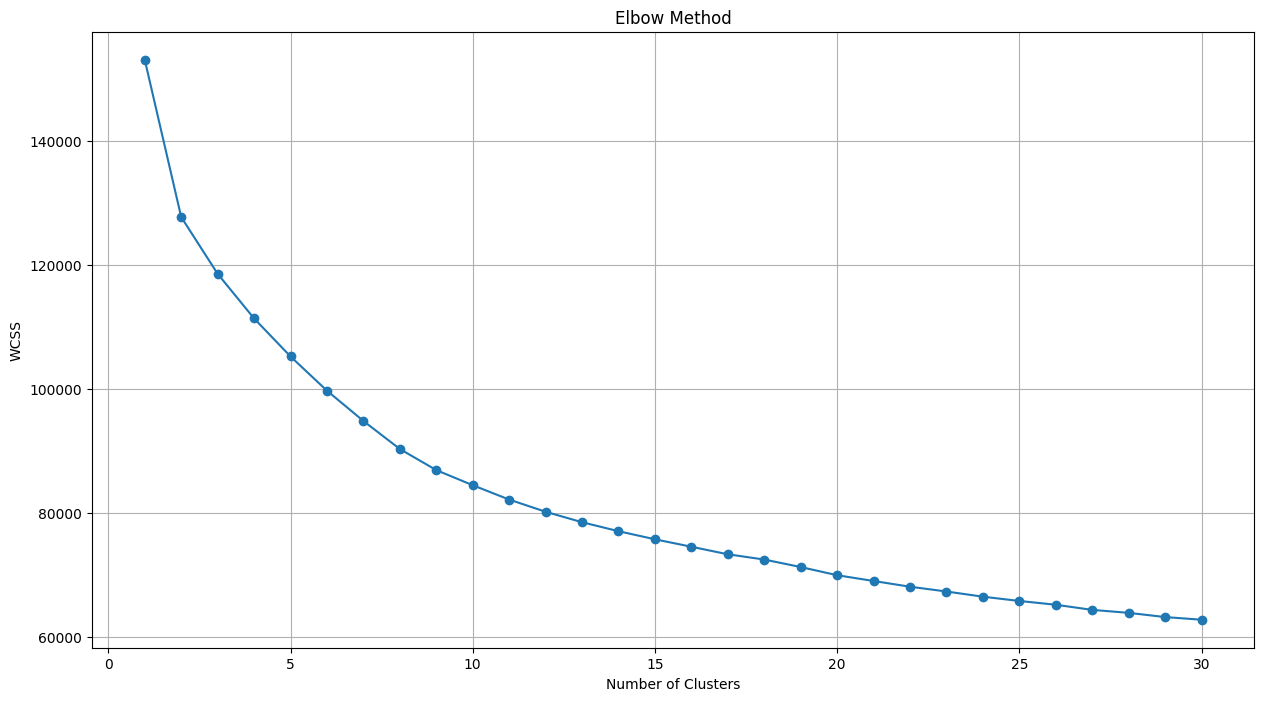

In [35]:
optimise_k_means(less_lyrics_scaled_df, 30)

In [36]:
df_with_lyrics['genre'].nunique()

80

In [37]:
def k_score(data, max_k):
    means = []
    inertias = []

    for k in range(2, max_k+1):
        print(f"Testing k={k}")
        kmeans = KMeans(n_clusters=k, n_init=max_k)
        labels = kmeans.fit_predict(data)

        score = silhouette_score(data, labels)
        print(f"k={k}, Silhouette Score={score:.4f}")

In [38]:
k_score(less_lyrics_scaled_df, 30)

Testing k=2
k=2, Silhouette Score=0.2374
Testing k=3
k=3, Silhouette Score=0.1119
Testing k=4
k=4, Silhouette Score=0.1144
Testing k=5
k=5, Silhouette Score=0.1206
Testing k=6
k=6, Silhouette Score=0.1191
Testing k=7
k=7, Silhouette Score=0.1220
Testing k=8
k=8, Silhouette Score=0.1285
Testing k=9
k=9, Silhouette Score=0.1182
Testing k=10
k=10, Silhouette Score=0.1215
Testing k=11
k=11, Silhouette Score=0.1116
Testing k=12
k=12, Silhouette Score=0.1125
Testing k=13
k=13, Silhouette Score=0.1067
Testing k=14
k=14, Silhouette Score=0.1143
Testing k=15
k=15, Silhouette Score=0.1130
Testing k=16
k=16, Silhouette Score=0.1061
Testing k=17
k=17, Silhouette Score=0.1042
Testing k=18
k=18, Silhouette Score=0.1122
Testing k=19
k=19, Silhouette Score=0.1018
Testing k=20
k=20, Silhouette Score=0.0986
Testing k=21
k=21, Silhouette Score=0.1003
Testing k=22
k=22, Silhouette Score=0.1022
Testing k=23
k=23, Silhouette Score=0.0995
Testing k=24
k=24, Silhouette Score=0.1021
Testing k=25
k=25, Silhouet

Silhouette Score drops gradually after k=6, but stays above 0.2 until about k=15. That range (e.g., k=6 to k=12) could give  decent separation while offering enough diversity for personalized recommendations.

In [39]:
kmeans = KMeans(n_clusters= 10, n_init='auto')
kmeans.fit(less_lyrics_scaled_df)

df_with_lyrics['Cluster'] = kmeans.labels_
less_lyrics_scaled_df['Cluster'] = kmeans.labels_

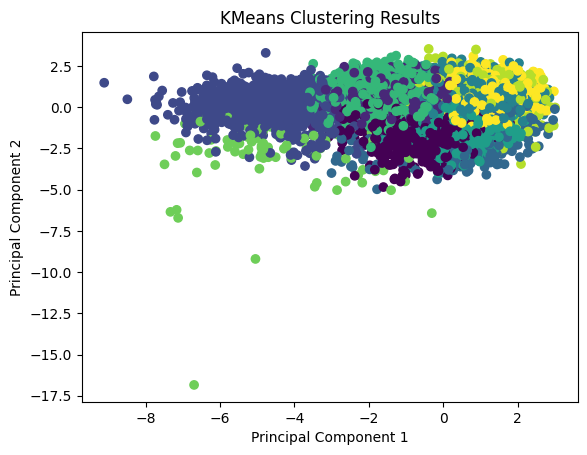

In [40]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(less_lyrics_scaled_df.drop('Cluster', axis=1)) # Exclude the cluster labels

less_lyrics_scaled_df['pca_1'] = reduced_features[:, 0]
less_lyrics_scaled_df['pca_2'] = reduced_features[:, 1]

plt.scatter(less_lyrics_scaled_df['pca_1'], less_lyrics_scaled_df['pca_2'], c=less_lyrics_scaled_df['Cluster'])
plt.title('KMeans Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [41]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
df_pca = less_lyrics_scaled_df.copy()
df_pca = df_pca.reset_index(drop=True)

# Assuming 'df_pca' is the DataFrame containing PCA1 and PCA2
pca_centroid = df_pca.mean(axis=0)  # Centroid of the PCA data

# Calculate the Euclidean distance of each point to the centroid
distances = np.linalg.norm(df_pca - pca_centroid, axis=1)

# Identify the indices of the farthest points (outliers)
outlier_indices = np.argsort(distances)[-5:]  # Top 5 outliers
outlier_data = df_pca.iloc[outlier_indices]
outlier_data.shape

(5, 17)

In [42]:
outlier_data

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Cluster,pca_1,pca_2
695,-0.711390,-3.000823,-2.255688,-1.488155,-2.439776,0.793816,-0.503356,1.456314,2.160106,-0.705133,-1.661654,-1.414381,14.839370,0.206619,7,-7.166546,-6.224261
722,-1.323304,-2.447623,-1.894047,-0.371177,-1.927494,-1.259739,-0.467287,1.977229,1.909982,-0.542697,-1.657602,-1.116235,15.417281,-2.204666,7,-7.126426,-6.711862
108,-1.391295,-2.459306,-2.084837,-1.488155,-2.739368,0.793816,-0.389515,1.784521,1.596536,-0.837617,-1.645041,-1.926524,15.981506,0.206619,7,-7.332161,-6.346169
550,-0.099477,-2.506039,-0.212909,0.745801,-3.117646,0.793816,1.074642,-0.910898,1.314751,0.874301,-1.681104,-0.363573,18.875221,0.206619,7,-5.048159,-9.202332
1345,-1.799237,-0.181080,0.334439,0.187312,-0.160066,-1.259739,-0.494339,1.862808,2.226594,2.740591,-0.521804,-0.425232,37.923721,-2.204666,7,-6.697268,-16.844948


In [43]:
df_pca = df_pca.drop(df_pca.index[outlier_indices])
df_full_pca = df_with_lyrics.drop(outlier_indices)

In [44]:
df_pca.shape

(10930, 17)

In [45]:
df_full_pca.shape

(10930, 22)

In [46]:
kmeans = KMeans(n_clusters= 10, n_init='auto')
kmeans.fit(df_pca)

df_full_pca['Cluster'] = kmeans.labels_
df_pca['Cluster'] = kmeans.labels_

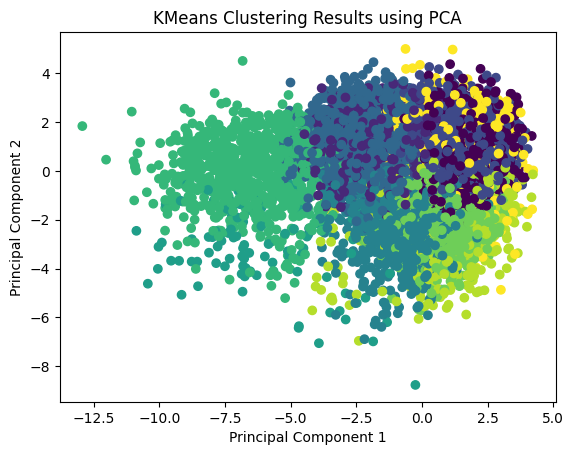

In [47]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df_pca.drop('Cluster', axis=1)) # Exclude the cluster labels

df_pca['pca_1'] = reduced_features[:, 0]
df_pca['pca_2'] = reduced_features[:, 1]

plt.scatter(df_pca['pca_1'], df_pca['pca_2'], c=df_pca['Cluster'])
plt.title('KMeans Clustering Results using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [48]:
def find_song_recommendation(track_name, artist_name, df):
    try:
        track_index = df[(df['track_name'].str.lower() == track_name.lower()) & (df['artist_name'].str.lower() == artist_name.lower())].index[0]
    except IndexError:
        print('Track name does not exist in the dataset')
        return None

    cluster = df.loc[track_index]['Cluster']

    filter = (df['Cluster'] == cluster)

    filtered_df = df[filter]

    for i in range(5):
        recommendation = filtered_df.sample()
        print(recommendation.iloc[0]['track_name'] + ' by ' + recommendation.iloc[0]['artist_name'])

In [49]:
song = input("Enter song name,artist name: ")
song_split = song.split(',')
song_name = song_split[0]
artist_name = song_split[1]
find_song_recommendation(song_name, artist_name, df_full_pca)

Enter song name,artist name:  i won't give up,jason mraz


Don't You Cry For Me by Cobi
One Last Time - 44 Remix by Christopher Jackson
Phone Call to God by Brett Eldredge
Brace (feat. Rainsford) by Twin Shadow
Love On Top by Hailey Tuck


# K Nearest Neighbors

In [50]:
audio_features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature']


In [51]:
knn = NearestNeighbors(n_neighbors=6, metric='cosine')
df_audio_features= less_lyrics_scaled_df[audio_features]
knn.fit(less_lyrics_scaled_df[audio_features])

NearestNeighbors(metric='cosine', n_neighbors=6)

In [52]:
def recommend_similar_songs(song_name, scaled_df, full_df):
  try:
    track_index = full_df[full_df['track_name'].str.lower() == song_name.lower()].index[0]
  except IndexError:
    return None
  song_row = scaled_df.iloc[track_index]
  song_vector = song_row[audio_features].values.reshape(1,-1) #  get numpy array of audio features
  distances, indices = knn.kneighbors(song_vector)
  similar_songs_idx = scaled_df.iloc[indices[0][1:]].index
  return full_df.loc[similar_songs_idx][['track_name', 'artist_name']]

In [53]:
generate_rec = recommend_similar_songs('I won\'t give up', less_lyrics_scaled_df, df_with_lyrics)
generate_rec.head(5)

C:\Users\Yun\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


,track_name,artist_name
1057,Say Something,A Great Big World
5809,"Girl Crush - Recorded at Metropolis Studios, L...",Harry Styles
1821,I'll Be Good,Jaymes Young
7968,K.,Rosie Carney
9592,Golden (Acoustic),Becca Mancari


In [54]:
# def recommend_similar_songs(song_name, scaled_df, full_df, audio_features, knn_model, all_lyrics_embeddings, num_recommendations=6):
#     try:
#         track_index = full_df[full_df['track_name'].str.lower() == song_name.lower()].index[0]
#     except IndexError:
#         print(f"'{song_name}' not found in dataset.")
#         return None

#     song_row = scaled_df.loc[track_index]
#     song_vector = song_row[audio_features].values.reshape(1, -1)

#     lyrics = full_df.loc[track_index, 'lyrics']  # Assuming the lyrics column exists
#     lyrics_embedding = get_lyrics_embedding(lyrics)

#     print('finding similar songs based on audio features')

#     distances, indices = knn_model.kneighbors(song_vector, n_neighbors=num_recommendations + 1)

#     audio_similar_songs_idx = scaled_df.iloc[indices[0][1:]].index
    
#     print('finding similar songs based on lyrics')

#     print('Get lyrics embeddings')
    
#     input_song_lyrics_embedding = all_lyrics_embeddings[track_index]
#     lyric_similarities = cosine_similarity(
#         [input_song_lyrics_embedding],
#         all_lyrics_embeddings
#     )[0]

#     print('Combining')

#     combined_similarities = distances[0][1:] * 0.5 + lyric_similarities[indices[0][1:]] * 0.5  # You can adjust weights here

#     print('Sorting')

#     recommended_indices = np.argsort(combined_similarities)[::-1][:num_recommendations]
#     top_scores = np.sort(combined_similarities)[::-1][:num_recommendations]
#     print(top_scores)
#     for idx in recommended_indices:
#         song_name = full_df.loc[idx, 'track_name']
#         artist_name = full_df.loc[idx, 'artist_name']
#         combined_similarity = combined_similarities[idx]
#         print(f"Song: {song_name} | Artist: {artist_name} | Combined Similarity: {combined_similarity:.3f}")



In [55]:
# def recommend_similar_songs(song_name, scaled_df, full_df, audio_features, all_lyrics_embeddings, num_recommendations=6):
#     try:
#         track_index = full_df[full_df['track_name'].str.lower() == song_name.lower()].index[0]
#     except IndexError:
#         print(f"'{song_name}' not found in dataset.")
#         return None

#     song_row = scaled_df.loc[track_index]
#     song_audio_vector = song_row[audio_features].values.reshape(1, -1)

#     lyrics = full_df.loc[track_index, 'lyrics']  
#     lyrics_embedding = get_lyrics_embedding(lyrics).reshape(1, -1)

#     combined_song_features = np.hstack((song_audio_vector, lyrics_embedding))  # Concatenate along columns

#     print('Training KNN model with combined features (audio + lyrics)')

#     audio_features_data = scaled_df[audio_features].values  
#     all_lyrics_embeddings_data = all_lyrics_embeddings  

#     combined_features = np.hstack((audio_features_data, all_lyrics_embeddings_data))

#     knn_model = NearestNeighbors(n_neighbors=num_recommendations + 1, metric='cosine')
#     knn_model.fit(combined_features)

#     print('Finding similar songs based on combined features')

#     distances, indices = knn_model.kneighbors(combined_song_features, n_neighbors=num_recommendations + 1)

#     similar_songs_idx = scaled_df.iloc[indices[0][1:]].index

#     print('Top Recommended Songs:')
#     for i, index in enumerate(indices[0][1:]):  
#         song_name = full_df.loc[index, 'track_name']
#         artist_name = full_df.loc[index, 'artist_name']
#         combined_similarity = 1 - distances[0][i + 1]  
#         print(f"Song: {song_name} | Artist: {artist_name} | Combined Similarity: {combined_similarity:.3f}")

#     recommended_songs = full_df.iloc[similar_songs_idx][['track_name', 'artist_name', 'lyrics']]

#     return recommended_songs


In [56]:
def recommend_similar_songs(song_name, artist_name, scaled_df, full_df, audio_features, all_lyrics_embeddings, all_description_embeddings, num_recommendations=6):
    try:

        track_index = full_df[(full_df['track_name'].str.lower() == song_name.lower()) & (full_df['artist_name'].str.lower() == artist_name.lower())].index[0]
    except IndexError:
        print(f"'{song_name}' not found in dataset.")
        return None

    song_row = scaled_df.loc[track_index]
    song_audio_vector = song_row[audio_features].values.reshape(1, -1)

    lyrics = full_df.loc[track_index, 'lyrics']  
    lyrics_embedding = get_embedding(lyrics).reshape(1, -1)

    desc = full_df.loc[track_index, 'description']  
    desc_embedding = get_embedding(desc).reshape(1, -1)

    combined_song_features = np.hstack((song_audio_vector, lyrics_embedding, desc_embedding))  

    # print('Training KNN model with combined features (audio + lyrics + description)')

    audio_features_data = scaled_df[audio_features].values  

    combined_features = np.hstack((audio_features_data, all_lyrics_embeddings, all_description_embeddings))

    knn_model = NearestNeighbors(n_neighbors=num_recommendations + 1, metric='cosine')
    knn_model.fit(combined_features)

    # print('Finding similar songs based on combined features')

    distances, indices = knn_model.kneighbors(combined_song_features, n_neighbors=num_recommendations + 1)

    similar_songs_idx = scaled_df.iloc[indices[0][1:]].index

    print('Top Recommended Songs:')
    for i, index in enumerate(indices[0][1:]):  
        song_name = full_df.loc[index, 'track_name']
        artist_name = full_df.loc[index, 'artist_name']
        combined_similarity = 1 - distances[0][i + 1]  
        print(f"Song: {song_name} | Artist: {artist_name} | Combined Similarity: {combined_similarity:.3f}")

    recommended_songs = full_df.iloc[similar_songs_idx][['track_name', 'artist_name', 'lyrics']]

    return recommended_songs


Generate 4 recommendations based on cosine similarity in audio features and meaning behind lyrics

In [57]:
# generate_rec = recommend_similar_songs('Love Someone', less_lyrics_scaled_df, df_with_lyrics, features, all_lyrics_embeddings, all_description_embeddings)

In [58]:
song = input("Enter song name,artist name: ")
song_split = song.split(',')
song_name = song_split[0]
artist_name = song_split[1]
generate_rec = recommend_similar_songs(song_name, artist_name, less_lyrics_scaled_df, df_with_lyrics, features, all_lyrics_embeddings, all_description_embeddings)

Enter song name,artist name:  love someone,lukas graham


Top Recommended Songs:
Song: Dusk Till Dawn (feat. Sia) - Radio Edit | Artist: ZAYN | Combined Similarity: 0.866
Song: Way down We Go | Artist: KALEO | Combined Similarity: 0.821
Song: So Far Away (feat. Jamie Scott & Romy Dya) | Artist: Martin Garrix | Combined Similarity: 0.811
Song: Darkside | Artist: Alan Walker | Combined Similarity: 0.809
Song: It Won't Kill Ya | Artist: The Chainsmokers | Combined Similarity: 0.801
Song: Do Or Die | Artist: Axel Johansson | Combined Similarity: 0.800


Using text prompt

In [59]:
df_with_lyrics.head(5)

,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,...,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,lyrics,description,Cluster
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,...,0.6940,0.000000,0.115,0.1390,133.406,240166,3.0,\r\n\r\nWhen I look into your eyes\r\nIt's lik...,"Track: I Won't Give Up, Artist: Jason Mraz, Ge...",6
1,Sara Bareilles,Stay,24xqELXbmKDFLKkR3271jb,37,2012,acoustic,0.262,0.341,2,-8.496,...,0.5890,0.001540,0.140,0.1810,99.913,262613,3.0,"\r\n\r\nSaturday, empty room, filled with peop...","Track: Stay, Artist: Sara Bareilles, Genre: ac...",6
2,Johnnyswim,Annie,6SU4bifjXJwueCHG8maEXz,34,2012,acoustic,0.594,0.251,4,-9.036,...,0.6300,0.000003,0.112,0.0502,98.819,270841,4.0,\r\nThe carpet still holds the shape of your f...,"Track: Annie, Artist: Johnnyswim, Genre: acoustic",6
3,Otis Spann,Someday (Electric),5ZUxxja3WzBZUFF6P9M9HN,34,2012,acoustic,0.581,0.333,0,-14.209,...,0.9440,0.472000,0.332,0.4880,94.197,206800,3.0,\r\nThe gypsy woman told my mother\r\nBefore I...,"Track: Someday (Electric), Artist: Otis Spann,...",6
4,Green River Ordinance,New Day,7wT7EvhnZ1MygDBoRyO9z0,20,2012,acoustic,0.542,0.693,9,-6.049,...,0.0572,0.000146,0.119,0.4210,95.003,258573,4.0,\r\n\r\nIn the city that never sleeps\r\nRestl...,"Track: New Day, Artist: Green River Ordinance,...",4


In [60]:
song = input("Enter song name,artist name: ")
song_split = song.split(',')
song_name = song_split[0]
artist_name = song_split[1]
generate_rec = recommend_similar_songs(song_name, artist_name, less_lyrics_scaled_df, df_with_lyrics, features, all_lyrics_embeddings, all_description_embeddings)

Enter song name,artist name:  i won't give up,jason mraz


Top Recommended Songs:
Song: Girl Crush - Recorded at Metropolis Studios, London | Artist: Harry Styles | Combined Similarity: 0.921
Song: Say Something | Artist: A Great Big World | Combined Similarity: 0.904
Song: I'll Be Good | Artist: Jaymes Young | Combined Similarity: 0.889
Song: Cover Me Up | Artist: Jason Isbell | Combined Similarity: 0.882
Song: Iris | Artist: Kina Grannis | Combined Similarity: 0.875
Song: Like I'm Gonna Lose You | Artist: Jasmine Thompson | Combined Similarity: 0.873


In [62]:
def recommend_music_using_prompt(df, user_text_embedding, lyrics_embeddings, num_recommendations=5):
    # Compute the cosine similarity between the user's input and each song's lyrics embedding
    similarities = [cosine_similarity([user_text_embedding], [lyrics_embedding])[0][0] for lyrics_embedding in lyrics_embeddings]
    
    # Now, we'll rank the songs by similarity without modifying the dataframe
    # Sort by similarity score in descending order and get the top recommendations
    sorted_indices = sorted(range(len(similarities)), key=lambda i: similarities[i], reverse=True)[:num_recommendations]
    
    # Display the sorted songs with their similarity scores
    for idx in sorted_indices:
        print(f"Song: {df['track_name'][idx]}, Artist: {df['artist_name'][idx]}, Similarity: {similarities[idx]:.3f}")


In [63]:
def recommend_music_using_knn(df, user_text_embedding, lyrics_embeddings, num_recommendations=5):

    knn_model = NearestNeighbors(n_neighbors=num_recommendations, metric='cosine')
    knn_model.fit(lyrics_embeddings)

    distances, indices = knn_model.kneighbors([user_text_embedding], n_neighbors=num_recommendations)

    print(f"Top {num_recommendations} Recommended Songs:")
    for i, idx in enumerate(indices[0][1:]): 
        song_name = df['track_name'].iloc[idx]
        artist_name = df['artist_name'].iloc[idx]
        similarity_score = 1 - distances[0][i + 1] 
        print(f"Song: {song_name}, Artist: {artist_name}, Similarity: {similarity_score:.3f}")

In [64]:
user_prompt= "I miss my old home and childhood memories"
user_text_embedding = model.encode(user_prompt)

In [65]:
user_text_embedding.size

384

In [66]:
all_lyrics_embeddings.shape

(10935, 384)

In [67]:
recommend_music_using_prompt(df_with_lyrics, user_text_embedding, all_lyrics_embeddings)

Song: If the World Had a Front Porch, Artist: Tracy Lawrence, Similarity: 0.467
Song: Records (feat. Hier), Artist: Y.V.E. 48, Similarity: 0.452
Song: The World I Used to Know, Artist: We Came As Romans, Similarity: 0.431
Song: Death Becomes My Voice, Artist: Ringworm, Similarity: 0.427
Song: Oh Child, Artist: Robin Schulz, Similarity: 0.420


In [68]:
user_prompt2= "I need something energetic to work out to."
user_text_embedding2 = model.encode(user_prompt2)

In [81]:
recommend_music_using_knn(df_with_lyrics, user_text_embedding2, all_lyrics_embeddings)

Top 5 Recommended Songs:
Song: Trust Fund Baby, Artist: Why Don't We, Similarity: 0.432
Song: Vibe., Artist: JoJo, Similarity: 0.363
Song: Lost, Artist: Toonorth, Similarity: 0.357
Song: Sou Teu Fã, Artist: DENNIS, Similarity: 0.339
Song: All Out Life, Artist: Slipknot, Similarity: 0.325


In [70]:
user_prompt3 = "Today I felt really down after a hard day at work. I just wanted to relax and listen to something calming but with a little energy, something that makes me feel like I’m not alone."
user_text_embedding3 = model.encode(user_prompt3)
recommend_music_using_prompt(df_with_lyrics, user_text_embedding3, all_lyrics_embeddings)

Song: In My Head, Artist: INF1N1TE, Similarity: 0.478
Song: BLEACH, Artist: BROCKHAMPTON, Similarity: 0.470
Song: Rx (Medicate), Artist: Theory of a Deadman, Similarity: 0.455
Song: Nervous Tics (feat. Holly Walker), Artist: Maribou State, Similarity: 0.444
Song: Head On (Hold On To Your Heart), Artist: Man Man, Similarity: 0.443


In [71]:
user_prompt4 = "Today was one of those days where everything seemed to be moving too fast. I woke up late, rushed through breakfast, and barely made it to work on time. The whole day felt like I was running on autopilot—meetings, emails, deadlines... everything was just piling up. By the time I got home, I was exhausted, but I knew I needed to unwind before I could even think about going to bed.I decided to go for a walk to clear my head. The fresh air helped a little, but I was still carrying the weight of the day with me. I felt a little disconnected, like I was physically present but mentally somewhere else. I wanted to listen to music that matched how I felt—something that was a little melancholic but also had a sense of hope. I wanted to feel like I wasn't the only one struggling, but I also needed something to remind me that there’s light at the end of the tunnel. I guess I’m craving a mix of calmness and energy, something that’s soothing but also gives me a little boost. It’s a weird balance—feeling both drained and needing to feel alive again."
user_text_embedding4 = model.encode(user_prompt4)
recommend_music_using_prompt(df_with_lyrics, user_text_embedding4, all_lyrics_embeddings)

Song: Rest, Artist: Curses, Similarity: 0.573
Song: Legion, Artist: Sins In Vain, Similarity: 0.569
Song: BLEACH, Artist: BROCKHAMPTON, Similarity: 0.542
Song: Nervous Tics (feat. Holly Walker), Artist: Maribou State, Similarity: 0.539
Song: Head On (Hold On To Your Heart), Artist: Man Man, Similarity: 0.537


In [76]:
recommend_music_using_knn(df, user_text_embedding3, all_lyrics_embeddings)

Top 5 Recommended Songs:
Song: Talkin Shhh - Roberts, Shaps & Keys Remix, Artist: Jovonn, Similarity: 0.478
Song: When Will I See You Again?, Artist: Anders Osborne, Similarity: 0.470
Song: Blasphemy, Artist: Nunslaughter, Similarity: 0.455
Song: Kiss Me, Artist: Summer Heart, Similarity: 0.444
Song: Dos Lucecitas, Artist: Ondatrópica, Similarity: 0.443


In [86]:
test_prompt = input("Enter text:")
user_text_embedding = model.encode(test_prompt)
recommend_music_using_prompt(df_with_lyrics, user_text_embedding, all_lyrics_embeddings)

Enter text: I woke up today feeling pretty good, all things considered. The sun was shining, and I actually felt rested, which is rare. It’s been a busy few weeks, but I’ve managed to keep up with everything. There’s this feeling of contentment that I’ve had lately — things are going well in most areas of my life, and I’m proud of the progress I’ve made. But at the same time, I feel like something’s missing, like there’s a next step I’m waiting for. I’m not unhappy, but I guess there’s always that little voice in my head telling me to keep pushing, to aim for something bigger. It’s like I can see where I’m going, but I’m still figuring out how to get there.


Song: Melatonin (Unplugged), Artist: Phoria, Similarity: 0.603
Song: My Silver Lining, Artist: First Aid Kit, Similarity: 0.578
Song: Legion, Artist: Sins In Vain, Similarity: 0.566
Song: Rest, Artist: Curses, Similarity: 0.555
Song: I'm Free (At Last), Artist: Masked Intruder, Similarity: 0.538


In [85]:
test_prompt = input("Enter text:")
user_text_embedding = model.encode(test_prompt)
recommend_music_using_knn(df_with_lyrics, user_text_embedding, all_lyrics_embeddings)

Enter text: Today, I feel like everything’s going smoothly, but there’s a part of me still reflecting on the past and wondering about the future.


Top 5 Recommended Songs:
Song: Adam Forever, Artist: U137, Similarity: 0.591
Song: My Repair, Artist: Sons Of The East, Similarity: 0.508
Song: Floral Hymn, Artist: Echo Ark, Similarity: 0.495
Song: All I Know, Artist: EDX, Similarity: 0.495
Song: Balenciaga, Artist: Cheat Codes, Similarity: 0.486


In [87]:
test_prompt = input("Enter text:")
user_text_embedding = model.encode(test_prompt)
recommend_music_using_knn(df_with_lyrics, user_text_embedding, all_lyrics_embeddings)

Enter text: Had such a good day today! The weather was perfect—sunny but with a nice breeze—so I took my lunch outside and sat in the park. There were families, people walking their dogs, and even someone sketching the fountain. It just felt alive out there. I didn’t realize how much I missed being around that kind of energy.


Top 5 Recommended Songs:
Song: The Traces We Leave, Artist: Harakiri for the Sky, Similarity: 0.482
Song: Sweet Memories, Artist: CID, Similarity: 0.428
Song: Ether Garden, Artist: Henry Jamison, Similarity: 0.427
Song: Cairo, IL, Artist: Natalie Hemby, Similarity: 0.424
Song: Look At That Butt, Artist: Dillon Francis, Similarity: 0.421
